In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/riya-tealeaf-dataset/dataset/Leaf that uses to make tea/IMG20230816190644.jpg
/kaggle/input/riya-tealeaf-dataset/dataset/Leaf that uses to make tea/IMG20230816191719.jpg
/kaggle/input/riya-tealeaf-dataset/dataset/Leaf that uses to make tea/IMG20230816184716.jpg
/kaggle/input/riya-tealeaf-dataset/dataset/Leaf that uses to make tea/IMG20230816184836.jpg
/kaggle/input/riya-tealeaf-dataset/dataset/Leaf that uses to make tea/IMG20230816181247.jpg
/kaggle/input/riya-tealeaf-dataset/dataset/Leaf that uses to make tea/IMG20230816190707.jpg
/kaggle/input/riya-tealeaf-dataset/dataset/Leaf that uses to make tea/IMG20230816184311.jpg
/kaggle/input/riya-tealeaf-dataset/dataset/Leaf that uses to make tea/IMG20230816191139.jpg
/kaggle/input/riya-tealeaf-dataset/dataset/Leaf that uses to make tea/IMG20230816190710.jpg
/kaggle/input/riya-tealeaf-dataset/dataset/Leaf that uses to make tea/IMG20230816190058.jpg
/kaggle/input/riya-tealeaf-dataset/dataset/Leaf that uses to make tea/IMG2023081

In [29]:
import os
import pandas as pd
from glob import glob 

DATA_DIR = '/kaggle/input/riya-tealeaf-dataset'
image_paths = glob(os.path.join(DATA_DIR, '**', '*.jpg'), recursive=True)
image_paths.extend(glob(os.path.join(DATA_DIR, '**', '*.png'), recursive=True))
image_paths.extend(glob(os.path.join(DATA_DIR, '**', '*.jpeg'), recursive=True))

print(f"Total images found: {len(image_paths)}")

data = []
for img_path in image_paths:
    try:
        label = os.path.basename(os.path.dirname(img_path))
        data.append({'file_path': img_path, 'label': label})
    except Exception as e:
        print(f"Error processing path {img_path}: {e}")

# --- Load the list into a pandas DataFrame ---
df = pd.DataFrame(data)

# --- Display the first 5 rows to check ---
if df.empty:
    print("DataFrame is empty. Please check your DATA_DIR path.")
else:
    print("Data loaded successfully. Here are the first 5 rows:")
    print(df.head())

Total images found: 747
Data loaded successfully. Here are the first 5 rows:
                                           file_path  \
0  /kaggle/input/riya-tealeaf-dataset/dataset/Lea...   
1  /kaggle/input/riya-tealeaf-dataset/dataset/Lea...   
2  /kaggle/input/riya-tealeaf-dataset/dataset/Lea...   
3  /kaggle/input/riya-tealeaf-dataset/dataset/Lea...   
4  /kaggle/input/riya-tealeaf-dataset/dataset/Lea...   

                        label  
0  Leaf that uses to make tea  
1  Leaf that uses to make tea  
2  Leaf that uses to make tea  
3  Leaf that uses to make tea  
4  Leaf that uses to make tea  



---  Class Balance Analysis ---
Image count per class:
label
Leaf that not to be used to make tea    395
Leaf that uses to make tea              352
Name: count, dtype: int64


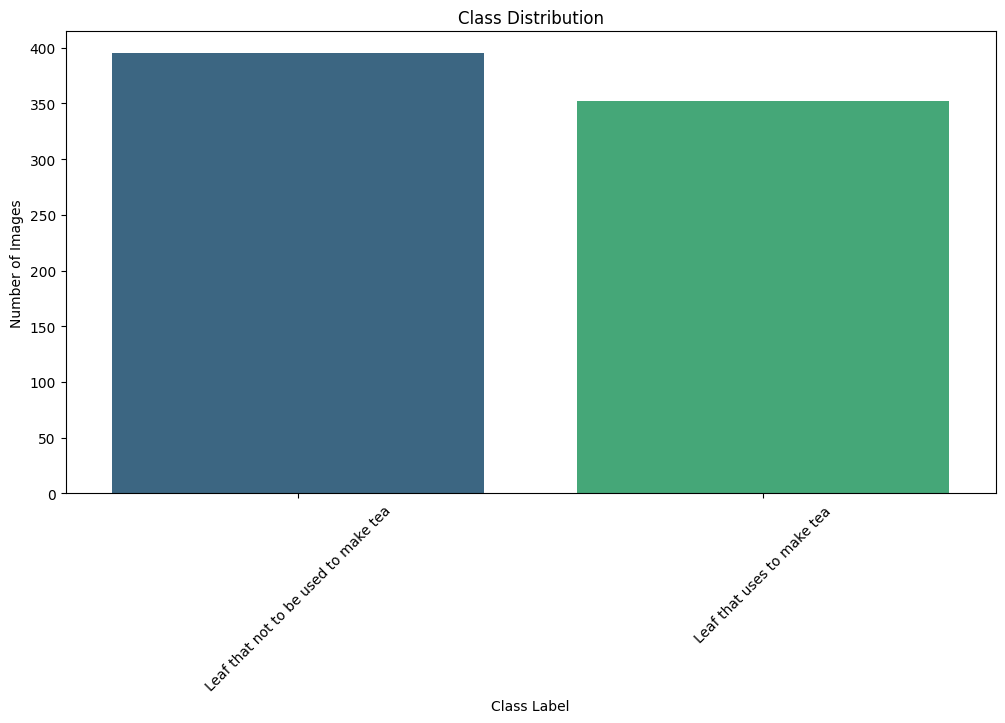

In [30]:
if not df.empty:
    print("\n---  Class Balance Analysis ---")
    class_counts = df['label'].value_counts()
    
    print("Image count per class:")
    print(class_counts)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
    plt.title('Class Distribution')
    plt.ylabel('Number of Images')
    plt.xlabel('Class Label')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Cannot analyze class balance: DataFrame is empty.")


--- Visualizing Sample Images ---

--- Sample Images for Class: 'Leaf that uses to make tea' ---


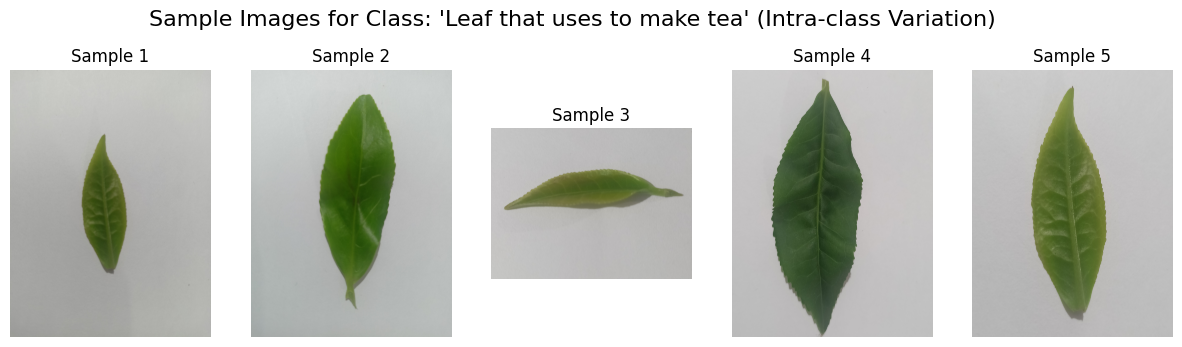


--- Sample Images for Class: 'Leaf that not to be used to make tea' ---


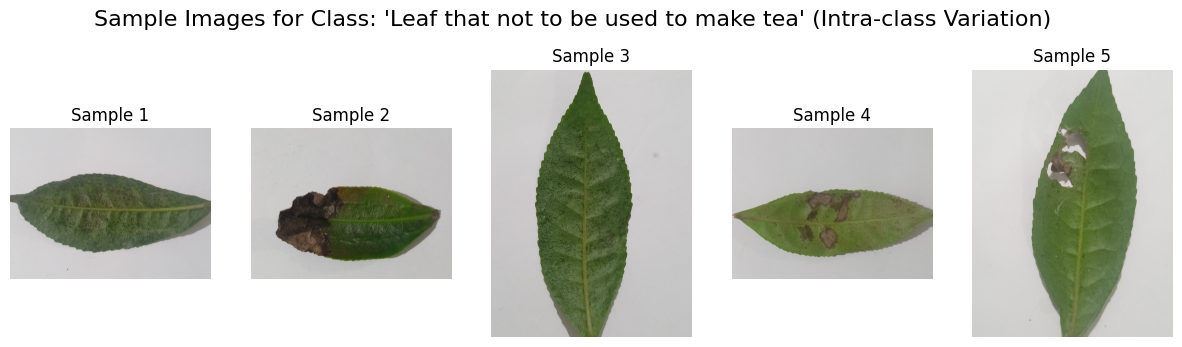

In [31]:
def show_sample_images_per_class(n_samples=5):
  
    if df.empty:
        print("Cannot show sample images: DataFrame is empty.")
        return
        
    unique_labels = df['label'].unique()
    
    for label in unique_labels:
        print(f"\n--- Sample Images for Class: '{label}' ---")
    
        sample_paths = df[df['label'] == label].sample(n_samples, replace=True)['file_path']
        
        plt.figure(figsize=(15, 4))
        plt.suptitle(f"Sample Images for Class: '{label}' (Intra-class Variation)", fontsize=16)
        
        for i, file_path in enumerate(sample_paths):
            try:
                img = Image.open(file_path)
                plt.subplot(1, n_samples, i + 1)
                plt.imshow(img)
                plt.title(f"Sample {i+1}")
                plt.axis('off')
            except Exception as e:
                plt.subplot(1, n_samples, i + 1)
                plt.title("Error Loading")
                plt.axis('off')
        plt.show()

print("\n--- Visualizing Sample Images ---")
show_sample_images_per_class(n_samples=5)


--- Image Property Analysis (Resolution & Aspect Ratio) ---

Top 10 Most Common Image Resolutions:
resolution
(4624, 3468)    402
(3468, 4624)    292
(1280, 960)      33
(960, 1280)      14
(9248, 6944)      2
(6944, 9248)      2
(961, 1280)       1
(1280, 961)       1
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


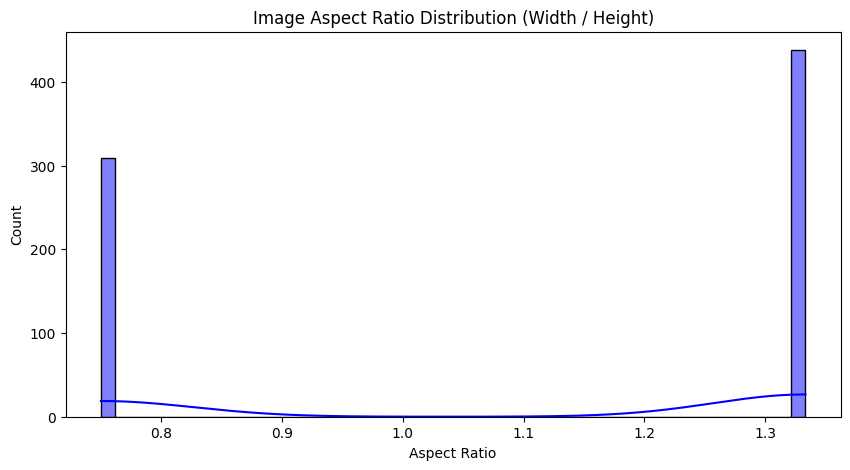

In [32]:
if not df.empty:
    print("\n--- Image Property Analysis (Resolution & Aspect Ratio) ---")
    resolutions = []
    aspect_ratios = []
    
    for file_path in df['file_path']:
        try:
            with Image.open(file_path) as img:
                width, height = img.size
                resolutions.append((width, height))
                aspect_ratios.append(width / height if height > 0 else 0)
        except Exception as e:
            resolutions.append((None, None))
            aspect_ratios.append(None)
    
    df['resolution'] = resolutions
    df['aspect_ratio'] = aspect_ratios
    
    print("\nTop 10 Most Common Image Resolutions:")
    print(df['resolution'].value_counts().head(10))
    
    plt.figure(figsize=(10, 5))
    sns.histplot(df['aspect_ratio'].dropna(), bins=50, kde=True, color='blue')
    plt.title('Image Aspect Ratio Distribution (Width / Height)')
    plt.xlabel('Aspect Ratio')
    plt.show()
else:
    print("Cannot analyze image properties: DataFrame is empty.")


--- Augmentation Probe (Image: IMG20230816201734.jpg) ---


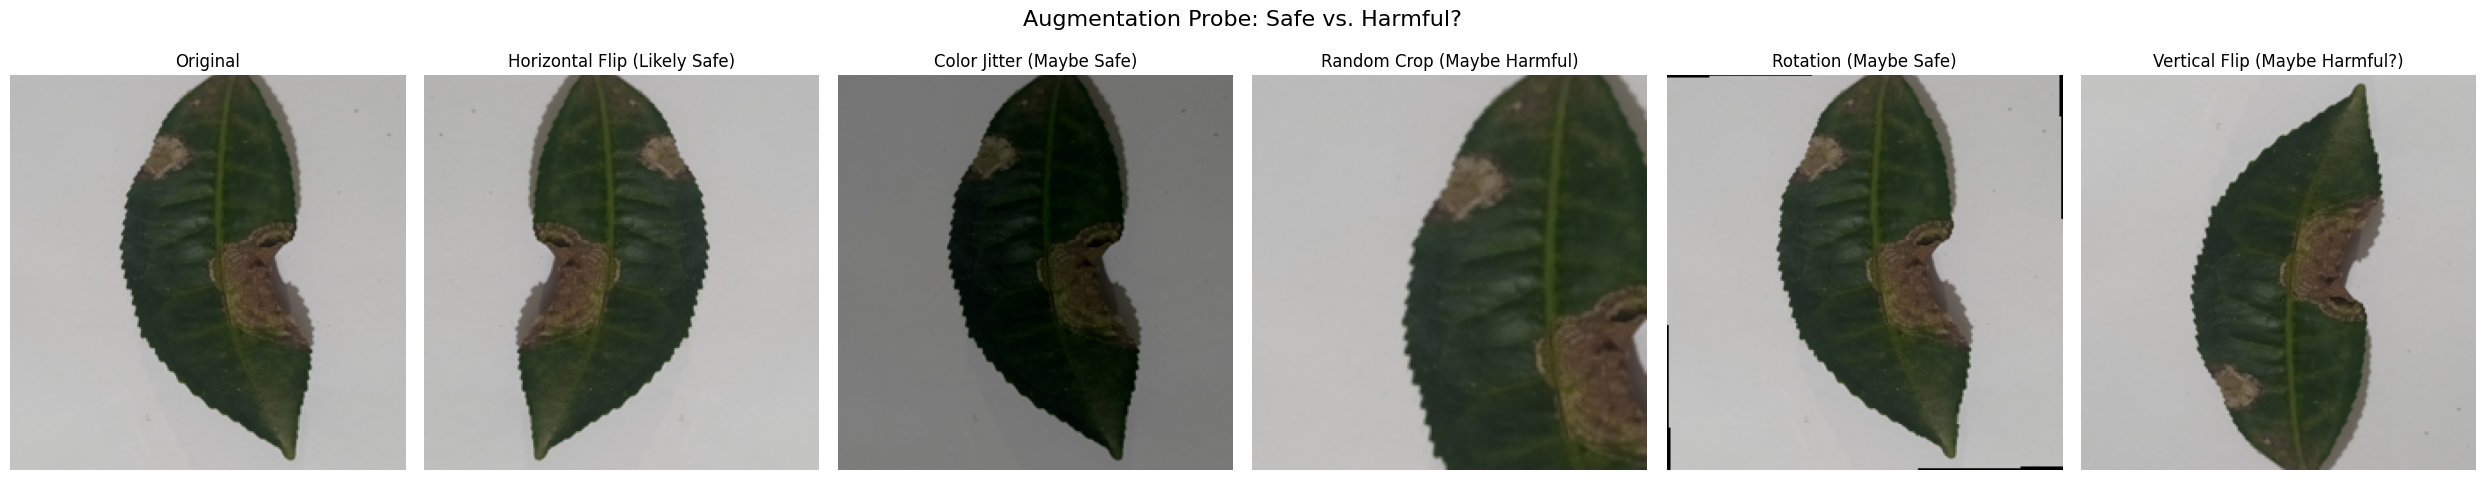

In [33]:
import matplotlib.pyplot as plt
import random
from PIL import Image
from torchvision import transforms
import os

# --- 5. Conduct Augmentation Probe ---
# This helps determine which transformations are safe vs. harmful.

def show_augmentations(img_path):
    """Applies and displays various augmentations on a single image."""
    try:
        # Resize to a standard size for comparison
        img_pil = Image.open(img_path).convert("RGB").resize((224, 224)) # Ensure RGB and resize
    except Exception as e:
        print(f"Error opening image {img_path}: {e}")
        return

    # Define a dictionary of transformations to test
    transforms_dict = {
        'Original': transforms.ToTensor(),
        'Horizontal Flip (Likely Safe)': transforms.Compose([
            transforms.RandomHorizontalFlip(p=1.0),
            transforms.ToTensor()
        ]),
        'Color Jitter (Maybe Safe)': transforms.Compose([
            transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
            transforms.ToTensor()
        ]),
        'Random Crop (Maybe Harmful)': transforms.Compose([
            transforms.RandomCrop(150), # A significant crop might remove key leaf parts
            transforms.Resize((224, 224)), # Resize back
            transforms.ToTensor()
        ]),
        'Rotation (Maybe Safe)': transforms.Compose([
            transforms.RandomRotation(degrees=30),
            transforms.ToTensor()
        ]),
        'Vertical Flip (Maybe Harmful?)': transforms.Compose([
            transforms.RandomVerticalFlip(p=1.0), # Check if leaf orientation matters
            transforms.ToTensor()
        ])
    }

    print(f"\n--- Augmentation Probe (Image: {os.path.basename(img_path)}) ---")
    plt.figure(figsize=(25, 5)) # Adjusted figure size for more transforms
    plt.suptitle("Augmentation Probe: Safe vs. Harmful?", fontsize=16)

    num_transforms = len(transforms_dict)

    for i, (name, transform) in enumerate(transforms_dict.items()):
        img_tensor = transform(img_pil)
        # Convert tensor from (C, H, W) to (H, W, C) for plotting
        img_to_show = img_tensor.permute(1, 2, 0).numpy()

        plt.subplot(1, num_transforms, i + 1)
        plt.imshow(img_to_show)
        plt.title(name)
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout
    plt.show()

# Run the augmentation probe on a random sample image from the dataframe 'df'
if not df.empty:
    try:
        sample_path_for_aug = df.sample(1)['file_path'].values[0]
        show_augmentations(sample_path_for_aug)
    except IndexError:
        print("Could not select a sample image. Is the DataFrame populated?")
else:
    print("DataFrame is empty. Cannot run augmentation probe.")


--- Color Distribution Analysis (Sample Histograms) ---

--- Class: 'Leaf that uses to make tea' ---


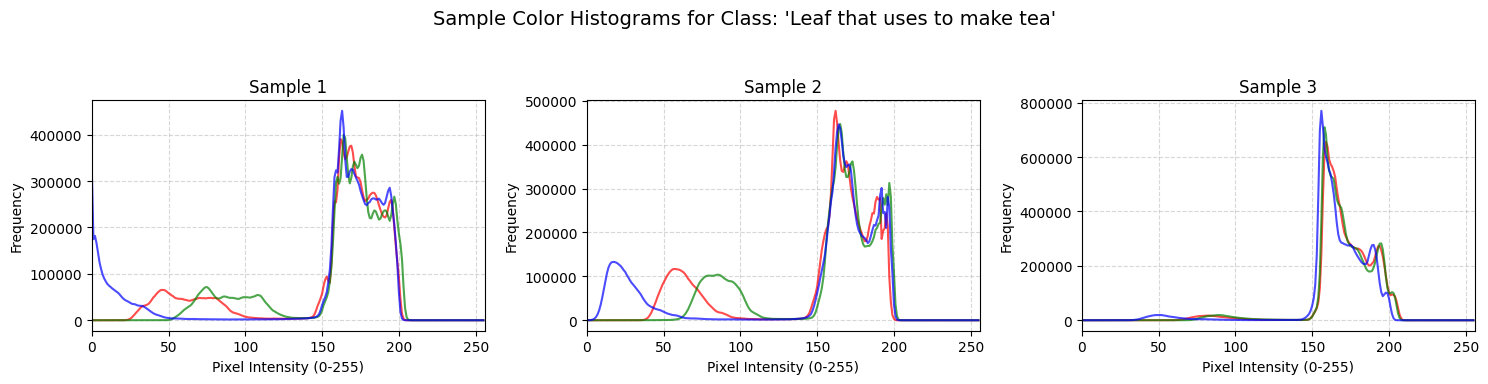


--- Class: 'Leaf that not to be used to make tea' ---


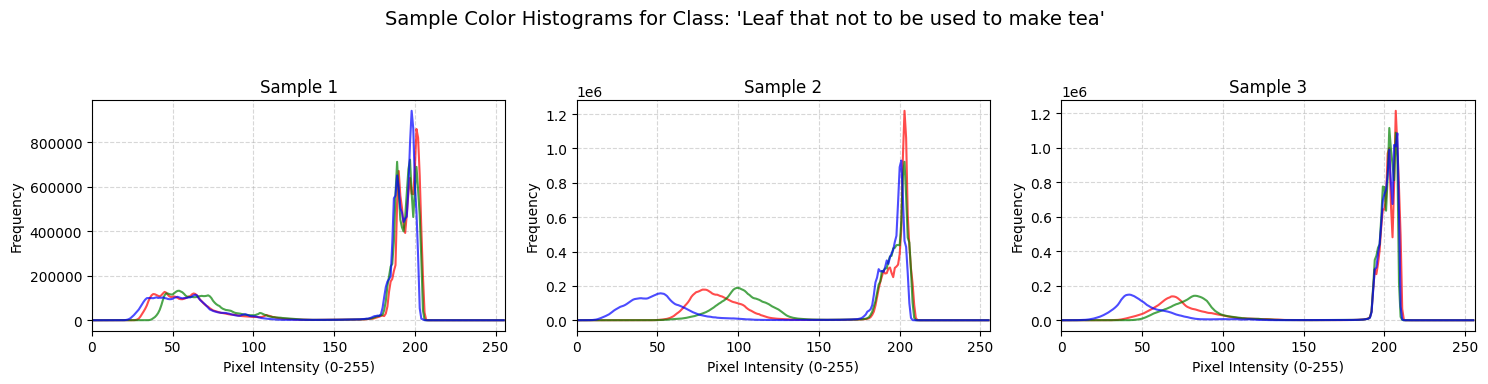

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# --- 4b. Investigate Image Properties (Color Distributions) ---

def plot_color_histogram(image_path, ax, title):
    """Calculates and plots the RGB color histogram for an image."""
    try:
        img = Image.open(image_path).convert("RGB")
        img_np = np.array(img)

        colors = ('red', 'green', 'blue')
        for i, color in enumerate(colors):
            histogram = np.histogram(img_np[:, :, i], bins=256, range=[0, 256])[0]
            ax.plot(histogram, color=color, alpha=0.7)

        ax.set_title(title)
        ax.set_xlabel("Pixel Intensity (0-255)")
        ax.set_ylabel("Frequency")
        ax.set_xlim([0, 256])
        ax.grid(True, linestyle='--', alpha=0.5)

    except Exception as e:
        ax.set_title(f"Error loading: {os.path.basename(image_path)}")
        print(f"Could not process image {image_path}: {e}")

# Select a few random samples from each class to compare color distributions
if not df.empty:
    n_samples_color = 3 # Number of samples per class for color analysis
    unique_labels = df['label'].unique()

    print("\n--- Color Distribution Analysis (Sample Histograms) ---")

    for label in unique_labels:
        print(f"\n--- Class: '{label}' ---")
        try:
            sample_paths = df[df['label'] == label].sample(n_samples_color, replace=False)['file_path'].tolist()

            fig, axes = plt.subplots(1, n_samples_color, figsize=(15, 4))
            if n_samples_color == 1: # Handle case of single sample
                axes = [axes]
            fig.suptitle(f"Sample Color Histograms for Class: '{label}'", fontsize=14)

            for i, file_path in enumerate(sample_paths):
                plot_color_histogram(file_path, axes[i], f"Sample {i+1}")

            plt.tight_layout(rect=[0, 0.03, 1, 0.93]) # Adjust layout
            plt.show()

        except ValueError:
            print(f"Not enough samples in class '{label}' to select {n_samples_color} unique images.")
        except IndexError:
            print(f"Could not select samples for class '{label}'. Is the DataFrame populated correctly?")
else:
    print("DataFrame is empty. Cannot perform color distribution analysis.")